In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

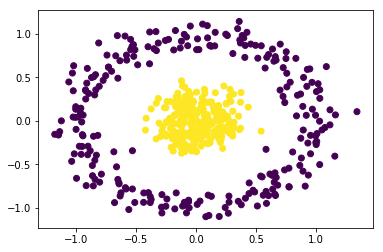

In [6]:
n_pts = 500
data, labels = make_circles(n_samples=n_pts,noise=0.1,factor=0.2,shuffle=True)

plt.scatter(data[:,0],data[:,1],c=labels)

In [20]:
model = Sequential()
model.add(Dense(3,input_dim=2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(lr=0.03),loss='binary_crossentropy',
             metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
h = model.fit(data,labels,epochs=100,verbose=1)

Epoch 1/100
500/500 [==============================] - 0s 310us/step - loss: 0.7424 - accuracy: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 48us/step - loss: 0.6932 - accuracy: 0.4980
Epoch 3/100
500/500 [==============================] - 0s 60us/step - loss: 0.6931 - accuracy: 0.5560
Epoch 4/100
500/500 [==============================] - 0s 80us/step - loss: 0.6886 - accuracy: 0.6700
Epoch 5/100
500/500 [==============================] - 0s 64us/step - loss: 0.6852 - accuracy: 0.5100
Epoch 6/100
500/500 [==============================] - 0s 42us/step - loss: 0.6771 - accuracy: 0.6720
Epoch 7/100
500/500 [==============================] - 0s 72us/step - loss: 0.6617 - accuracy: 0.8260
Epoch 8/100
500/500 [==============================] - 0s 94us/step - loss: 0.6402 - accuracy: 0.7960
Epoch 9/100
500/500 [==============================] - 0s 95us/step - loss: 0.6099 - accuracy: 0.8520
Epoch 10/100
500/500 [==============================] - 0s 77us/step - loss: 0.57

500/500 [==============================] - 0s 68us/step - loss: 0.0177 - accuracy: 0.9980
Epoch 81/100
500/500 [==============================] - 0s 70us/step - loss: 0.0175 - accuracy: 0.9980
Epoch 82/100
500/500 [==============================] - 0s 76us/step - loss: 0.0172 - accuracy: 0.9980
Epoch 83/100
500/500 [==============================] - 0s 66us/step - loss: 0.0166 - accuracy: 0.9980
Epoch 84/100
500/500 [==============================] - 0s 80us/step - loss: 0.0166 - accuracy: 0.9980
Epoch 85/100
500/500 [==============================] - 0s 74us/step - loss: 0.0162 - accuracy: 0.9980
Epoch 86/100
500/500 [==============================] - 0s 72us/step - loss: 0.0160 - accuracy: 0.9980
Epoch 87/100
500/500 [==============================] - 0s 64us/step - loss: 0.0157 - accuracy: 0.9980
Epoch 88/100
500/500 [==============================] - 0s 74us/step - loss: 0.0156 - accuracy: 0.9980
Epoch 89/100
500/500 [==============================] - 0s 66us/step - loss: 0.0152 - 

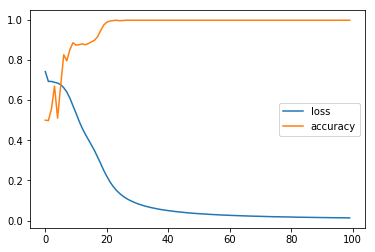

In [22]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

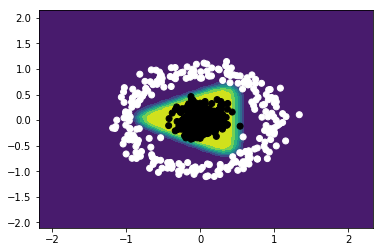

In [29]:
x_max , x_min = data[:,0].max()+1, data[:,0].min()-1
y_max , y_min = data[:,1].max()+1, data[:,1].min()-1

xx,yy = np.meshgrid(np.linspace(x_min,x_max),
                   np.linspace(y_min,y_max))
grid = np.c_[xx.ravel(),yy.ravel()]

pred = model.predict(grid).reshape(xx.shape)


plt.contourf(xx,yy,pred)
plt.scatter(data[:,0],data[:,1],c=labels,cmap='binary')
plt.show()